# Assignment no.1 - TheoreticalML - NB-Classifier

#### David george monir : 20201059
#### Maher mohsen bahig: 20200415
#### Section S5

## Used Libraries
### -Sk-Learn
### -matplotlib
### -numpy
### -pandas
### -seaborn
### -plotly_express

## Install Libraries


In [44]:
!pip install sklearn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install plotly_express

## Naive bayes classifier :
        In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve high accuracy levels

Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression,  which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

In the statistics literature, naive Bayes models are known under a variety of names, including simple Bayes and independence Bayes All these names reference the use of Bayes' theorem in the classifier's decision rule, but naive Bayes is not (necessarily) a Bayesian method

### Ref : Wiki


## Bayes' theorem
In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event For example, if the risk of developing health problems is known to increase with age, Bayes' theorem allows the risk to an individual of a known age to be assessed more accurately (by conditioning it on their age) than simply assuming that the individual is typical of the population as a whole.
### Ref : Wiki

$$ P(model|data) = \frac{P(data|model)P(model)}{P(data)} $$

#### Gaussian Naive Bayes

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right) $$

In [45]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly_express as px
import random

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

plt.style.use('./deeplearning.mplstyle')

### Preparing Iris dataset

In [46]:
# loading Iris dataset
iris = datasets.load_iris() 

# splitting features and classes( labels )
X = iris.data[:,:4]  #features 
y = iris.target # classes

# local csv file 
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Plotting Data

### Features Plotting & Analysis

####  2D Relations

<Figure size 576x576 with 0 Axes>

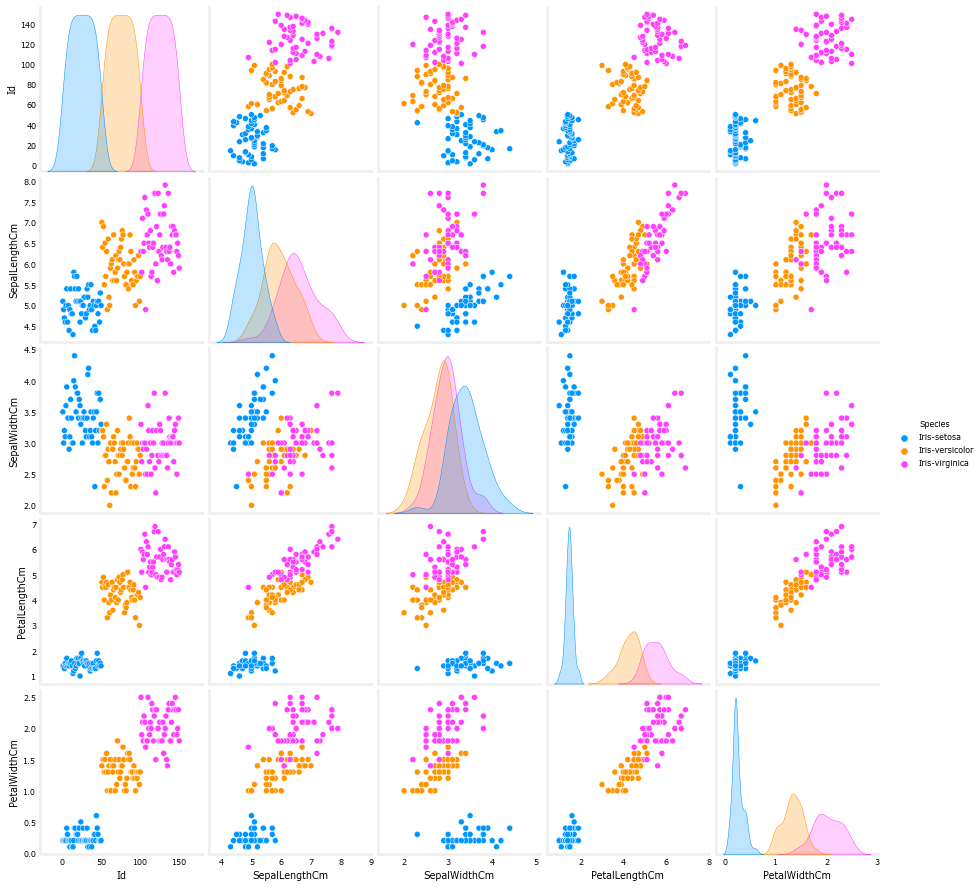

In [47]:
plt.figure(figsize=(8, 8))
ax = sns.pairplot(df, hue='Species')
plt.show()

####  3D Relation

In [48]:
px.scatter_3d(df, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

#### Area

([], [])

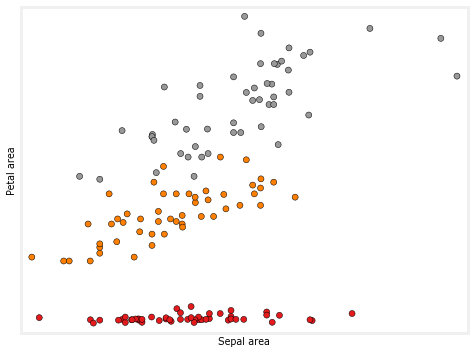

In [49]:
sepal_area = X[:, 0] * X[:, 1]
petal_area = X[:, 2] * X[:, 3]
x_min, x_max = sepal_area.min() - 0.5, sepal_area.max() + 0.5
y_min, y_max = petal_area.min() - 0.5, petal_area.max() + 0.5
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(sepal_area,petal_area,c=y,cmap=plt.cm.Set1,edgecolor="k")
plt.xlabel("Sepal area")
plt.ylabel("Petal area")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

### Train , Test , Validate Dataset Splitting 

#### Implemented Algorithm to split datasets [ based on splitted datasets must have " same distrbution " concept ] 

In [50]:
def train_validate_test_split(data, labels, test_ratio = 0.3, val_ratio = 0.3):
    
    # split ratio 
    no_train = len(data) - ((int(len(data)*test_ratio) + (len(data)*val_ratio)))
    no_validate = int(len(data)*val_ratio)
    no_test = int(len(data)*test_ratio)
    
    # split classes
    class_a = data[:50].copy()
    class_b = data[50:100].copy()
    class_c = data[100:150].copy()
    
    # shuffle 
    random.shuffle(class_a)
    random.shuffle(class_b)
    random.shuffle(class_c)
    
    # train dataset
    train_x = class_a.tolist()[0:20] + class_b.tolist()[0:20] + class_c.tolist()[0:20]
    train_y = [0 for _ in range(20)] + [1 for _ in range(20)] + [2 for _ in range(20)]
    
    # validate dataset
    validate_x = class_a.tolist()[20:35] + class_b.tolist()[20:35] + class_c.tolist()[20:35]
    validate_y = [0 for _ in range(15)] + [1 for _ in range(15)] + [2 for _ in range(15)]
    
    # test dataset
    test_x = class_a.tolist()[20:35] + class_b.tolist()[20:35] + class_c.tolist()[20:35]
    test_y = [0 for _ in range(15)] + [1 for _ in range(15)] + [2 for _ in range(15)]
    
    return np.array(train_x),np.array(train_y),np.array(validate_x),np.array(validate_y),np.array(test_x),np.array(test_y)

#### Auxillary function make use of sklearn built in split function

In [51]:
def train_validate_test_split2(data, labels, test_ratio = 0.3, val_ratio = 0.3):
    
    # split the tarin data set of ratio 0.4
    train_ratio = 1 - ( test_ratio + val_ratio )
    validate_ratio = val_ratio / ( test_ratio + val_ratio )
    test_ratio = test_ratio / ( test_ratio + val_ratio )
    
    tmp, train_x, tmp2,  train_y  = train_test_split(X, y, test_size = train_ratio , random_state = 42 )
    
    # split the test , validate data set of ratio 0.5 each ( 0.3 each from main dataset records )
    test_x, validate_x, test_y, validate_y = train_test_split(tmp, tmp2, test_size = validate_ratio , random_state = 42)
    
    
    return train_x,train_y,test_x,test_y,validate_x,validate_y


#### Calculating Accuracy

In [52]:
def calculate_accuracy(predicted_y, y):
    res = [ 1 for x in range(len(y)) if predicted_y[x] != y[x] ]
    return ( ( len(y) - (sum(res)) ) / len(y) )*100

#### Splitting

In [65]:
# split using shuffle
train_x,train_y,validate_x,validate_y,test_x,test_y = train_validate_test_split(X,y)

# split using sklearn build in 
#train_x,train_y,validate_x,validate_y,test_x,test_y = train_validate_test_split2(X,y)

### Using 4 features of dataset

#### Training

In [66]:
gnb = GaussianNB()
gnb.fit(train_x,train_y)

GaussianNB()

#### Accuracy

In [67]:
calculate_accuracy(gnb.predict(test_x),test_y)

97.77777777777777

## Decision Boundary

### Using only Sepals

#### Training

In [68]:
# extract 2 features only [ sepal length , sepal width ]
train_only_sepals = iris.data[:, :2]

# train using this 2 features
gnb_sepals = GaussianNB()
gnb_sepals = gnb_sepals.fit(train_only_sepals, iris.target)

#### Draw Decision Boundary

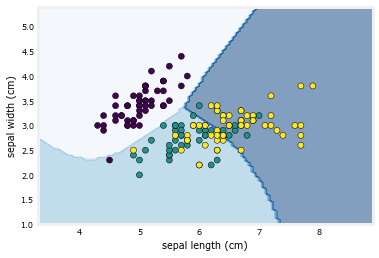

In [69]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnb_sepals, train_only_sepals, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
    cmap="Blues",
)
disp.ax_.scatter(train_only_sepals[:, 0], train_only_sepals[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### Accuracy 

In [70]:
# splitting the only 2 features needed from the test dataset
test_only_sepals = np.vstack([test_x[:,0].copy(),test_x[:,1]].copy()) 
test_only_sepals = test_only_sepals.transpose()

# accuracy
calculate_accuracy(gnb_sepals.predict(test_only_sepals),test_y)

82.22222222222221

### Using only Petals

#### Training

In [71]:
# extract 2 features only [ petals length , petals width ]
data = np.vstack([X[:,2],X[:,3]]) 
data = data.transpose()
train_only_petals = data

# train using this 2 features
gnb_petals = GaussianNB()
gnb_petals = gnb_petals.fit(train_only_petals, iris.target)

#### Draw Decision Boundary

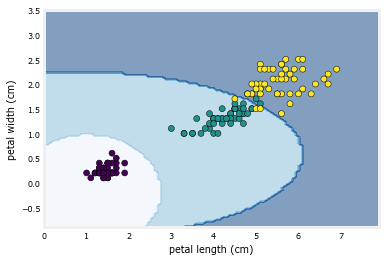

In [72]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnb_petals, train_only_petals, response_method="predict",
    xlabel=iris.feature_names[2], ylabel=iris.feature_names[3],
    alpha=0.5,
    cmap="Blues",
)
disp.ax_.scatter(train_only_petals[:, 0], train_only_petals[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### Accuracy 

In [73]:
# splitting the only 2 features needed from the test dataset
test_only_petals = np.vstack([test_x[:,2].copy(),test_x[:,3]].copy()) 
test_only_petals = test_only_petals.transpose()

# accuracy
calculate_accuracy(gnb_petals.predict(test_only_petals),test_y)

97.77777777777777

### Using Area of each Sepal and Petal

#### Training

In [74]:
# extract total 4 features 
# get the area of each one [ speal , petal ] to reduce the dimentions ( features )
# area = l * w 
# get only 2 features [ sepal area , petal area ]
sepal_area = X[:, 0] * X[:, 1]
petal_area = X[:, 2] * X[:, 3]
data = np.vstack([sepal_area,petal_area]) 
data = data.transpose()
train_area = data

# train using this 2 features
gnb_areas = GaussianNB()
gnb_areas = gnb_areas.fit(train_area, iris.target)

#### Draw Decision Boundary

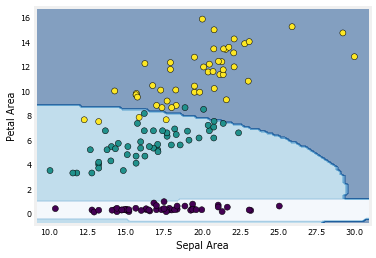

In [75]:
disp = DecisionBoundaryDisplay.from_estimator(
    gnb_areas , train_area , response_method="predict",
    xlabel = "Sepal Area", ylabel = "Petal Area",
    alpha=0.5,
    cmap="Blues",
)
disp.ax_.scatter(train_area[:, 0], train_area[:, 1], c=iris.target, edgecolor="k")
plt.show()

#### Accuracy 

In [76]:
# extracting those 2 features needed from the test dataset
test_only_sepals_area = test_x[:, 0].copy() * test_x[:, 1].copy()
test_only_petals_area = test_x[:, 2].copy() * test_x[:, 3].copy()
test_data = np.vstack([test_only_sepals_area,test_only_petals_area]) 
test_data = test_data.transpose()
test_area = test_data.copy()

# accuracy
calculate_accuracy(gnb_areas.predict(test_area),test_y)

97.77777777777777

# Thank You